In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import csv
from glob import glob
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
path_base = "/content/drive/MyDrive/Data Tugas Akhir"
Extraction = f'{path_base}{os.sep}Feature Extraction/'

Mounted at /content/drive


Baca data MI

In [ ]:
dir_wavelet_mi = Extraction + "Wavelet_Feature Extraction_MI.csv"
df_wavelet_mi = pd.read_csv(dir_wavelet_mi)
df_wavelet_mi = df_wavelet_mi.drop(["Unnamed: 0"], axis=1)
df_wavelet_mi

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet
0,5.513606e-08,0.000360,0.010658,-0.019367,6.097471e-09,1.293162e-07,-5.945314,-1.266238e-06,1.304559e-06,2.570797e-06,0.030025,593.552082
1,-1.440389e-09,0.003806,0.050635,-0.048263,5.776705e-24,1.448199e-05,0.183968,-5.690205e-08,6.202592e-08,1.189280e-07,0.098898,67.618452
2,1.395508e-08,0.000449,0.009586,-0.008493,-4.486849e-09,2.013682e-07,1.138416,-5.319990e-07,5.084948e-07,1.040494e-06,0.018079,208.588478
3,-1.295305e-08,0.000172,0.003234,-0.003434,2.735051e-09,2.949671e-08,0.593387,-4.219540e-07,4.706564e-07,8.926104e-07,0.006668,70.253770
4,2.496318e-08,0.000083,0.003206,-0.001993,-1.206899e-14,6.903196e-09,2.125572,-1.709463e-07,1.695625e-07,3.405088e-07,0.005199,166.167353
...,...,...,...,...,...,...,...,...,...,...,...,...
275,-9.524626e-09,0.001984,0.064371,-0.092287,1.946638e-22,3.935462e-06,-2.107742,-4.155588e-06,4.175679e-06,8.331267e-06,0.156658,567.789914
276,-1.342459e-08,0.000104,0.004294,-0.006447,-1.562218e-11,1.071480e-08,-3.386965,-1.418724e-07,1.383410e-07,2.802134e-07,0.010741,402.641682
277,1.342379e-08,0.000053,0.000674,-0.000900,-7.079732e-22,2.831791e-09,0.052676,-1.486732e-07,1.420825e-07,2.907557e-07,0.001574,48.351550
278,-1.086803e-07,0.001080,0.014115,-0.022803,1.321176e-09,1.166008e-06,-1.649113,-4.643630e-07,4.692460e-07,9.336090e-07,0.036919,97.726239


In [ ]:
dir_mfcc_mi = Extraction + "MFCC_Feature Extraction_MI.csv"
df_mfcc_mi = pd.read_csv(dir_mfcc_mi)
df_mfcc_mi = df_mfcc_mi.drop(["Unnamed: 0"], axis=1)
df_mfcc_mi

,Mean_mfcc,Std_mfcc,Max_mfcc,Min_mfcc,Med_mfcc,Var_mfcc,Skew_mfcc,Q1_mfcc,Q3_mfcc,IQR_mfcc,MinMax_mfcc,Kurt_mfcc
0,-42.781790,203.01400,226.25555,-937.51807,0.0,41214.688,-4.112076,-0.067769,3.305185,3.372954,1163.7737,14.966882
1,-35.351078,162.44913,138.55405,-748.05664,0.0,26389.720,-4.113519,0.000000,0.000000,0.000000,886.6107,14.973974
2,-41.667530,199.13484,128.98730,-919.72240,0.0,39654.684,-4.104900,0.000000,2.524819,2.524819,1048.7097,14.931710
3,-44.585094,226.68195,171.20108,-1049.70290,0.0,51384.703,-4.101707,0.000000,8.424197,8.424197,1220.9039,14.912763
4,-47.162777,241.80898,175.60138,-1118.96220,0.0,58471.582,-4.102205,0.000000,9.160215,9.160215,1294.5635,14.915507
...,...,...,...,...,...,...,...,...,...,...,...,...
275,-34.833010,159.06989,179.37866,-731.86957,0.0,25303.230,-4.120394,0.000000,0.000000,0.000000,911.2482,15.009034
276,-50.110010,241.53738,250.35725,-1117.97670,0.0,58340.310,-4.105695,0.000000,3.858673,3.858673,1368.3340,14.934023
277,-49.080097,244.24017,159.76341,-1131.37080,0.0,59653.266,-4.099563,0.000000,6.634407,6.634407,1291.1343,14.903861
278,-40.352814,186.43457,164.76727,-859.44415,0.0,34757.848,-4.111186,0.000000,0.010956,0.010956,1024.2114,14.963735


In [ ]:
dir_shannon_mi = Extraction + "Shannon_Feature Extraction_MI.csv"
df_shannon_mi = pd.read_csv(dir_shannon_mi)
df_shannon_mi = df_shannon_mi.drop(["Unnamed: 0"], axis=1)
df_shannon_mi

,Entropy
0,13.398916
1,13.401125
2,13.399459
3,13.400000
4,13.400591
...,...
275,13.398275
276,13.400100
277,13.400601
278,13.399442


In [ ]:
dir_cqt_mi = Extraction + "cqt_Feature Extraction_MI.csv"
df_cqt_mi = pd.read_csv(dir_cqt_mi)
df_cqt_mi = df_cqt_mi.drop(["Unnamed: 0"], axis=1)
df_cqt_mi

,Mean_cqt,Std_cqt,Max_cqt,Min_cqt,Med_cqt,Var_cqt,Skew_cqt,Q1_cqt,Q3_cqt,IQR_cqt,MinMax_cqt,Kurt_cqt
0,0.000266,0.002501,0.081133,1.426110e-14,6.806589e-07,6.253932e-06,2.845682,2.445680e-09,9.035778e-06,9.033332e-06,0.081133,9.097176
1,0.001499,0.021342,1.093340,1.540325e-27,5.785899e-10,4.555021e-04,NaN,6.917347e-14,1.470965e-06,1.470965e-06,1.093340,NaN
2,0.000219,0.002423,0.216592,3.752317e-15,4.133990e-07,5.871079e-06,2.918039,1.069127e-09,8.655004e-06,8.653935e-06,0.216592,9.947417
3,0.000344,0.001344,0.023277,2.440916e-15,4.587889e-07,1.805325e-06,2.953357,2.174862e-09,1.673181e-05,1.672964e-05,0.023277,9.442159
4,0.000153,0.000558,0.011752,8.530315e-17,1.724250e-07,3.113649e-07,2.618803,1.321550e-09,1.754462e-05,1.754330e-05,0.011752,7.424532
...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.000731,0.012698,0.967555,5.506045e-26,2.119051e-07,1.612410e-04,2.695481,1.226196e-09,1.593213e-05,1.593091e-05,0.967555,NaN
276,0.000115,0.000746,0.033709,4.320871e-16,3.388472e-08,5.570340e-07,3.243056,6.014547e-11,1.940905e-06,1.940845e-06,0.033709,11.656476
277,0.000095,0.000395,0.008421,3.381297e-26,5.332789e-08,1.557480e-07,2.995279,9.937292e-11,6.067600e-06,6.067501e-06,0.008421,NaN
278,0.000561,0.007131,0.440101,8.060344e-15,1.667136e-07,5.085329e-05,2.974461,2.797433e-10,3.374098e-06,3.373818e-06,0.440101,9.758514


In [ ]:
df_cqt_mi = df_cqt_mi.drop(["Skew_cqt"], axis=1)
df_cqt_mi= df_cqt_mi.drop(["Kurt_cqt"], axis=1)
df_cqt_mi

,Mean_cqt,Std_cqt,Max_cqt,Min_cqt,Med_cqt,Var_cqt,Q1_cqt,Q3_cqt,IQR_cqt,MinMax_cqt
0,0.000266,0.002501,0.081133,1.426110e-14,6.806589e-07,6.253932e-06,2.445680e-09,9.035778e-06,9.033332e-06,0.081133
1,0.001499,0.021342,1.093340,1.540325e-27,5.785899e-10,4.555021e-04,6.917347e-14,1.470965e-06,1.470965e-06,1.093340
2,0.000219,0.002423,0.216592,3.752317e-15,4.133990e-07,5.871079e-06,1.069127e-09,8.655004e-06,8.653935e-06,0.216592
3,0.000344,0.001344,0.023277,2.440916e-15,4.587889e-07,1.805325e-06,2.174862e-09,1.673181e-05,1.672964e-05,0.023277
4,0.000153,0.000558,0.011752,8.530315e-17,1.724250e-07,3.113649e-07,1.321550e-09,1.754462e-05,1.754330e-05,0.011752
...,...,...,...,...,...,...,...,...,...,...
275,0.000731,0.012698,0.967555,5.506045e-26,2.119051e-07,1.612410e-04,1.226196e-09,1.593213e-05,1.593091e-05,0.967555
276,0.000115,0.000746,0.033709,4.320871e-16,3.388472e-08,5.570340e-07,6.014547e-11,1.940905e-06,1.940845e-06,0.033709
277,0.000095,0.000395,0.008421,3.381297e-26,5.332789e-08,1.557480e-07,9.937292e-11,6.067600e-06,6.067501e-06,0.008421
278,0.000561,0.007131,0.440101,8.060344e-15,1.667136e-07,5.085329e-05,2.797433e-10,3.374098e-06,3.373818e-06,0.440101


In [ ]:
dir_cr_mi = Extraction + "cr_Feature Extraction_MI.csv"
df_cr_mi = pd.read_csv(dir_cr_mi)
df_cr_mi = df_cr_mi.drop(["Unnamed: 0"], axis=1)
df_cr_mi

,Mean_cr,Std_cr,Max_cr,Min_cr,Med_cr,Var_cr,Skew_cr,Q1_cr,Q3_cr,IQR_cr,MinMax_cr,Kurt_cr
0,0.378765,0.350721,1.0,3.054346e-06,0.257694,0.123005,1.188771,0.053033,0.692220,0.639187,0.999997,0.597727
1,0.453124,0.343329,1.0,6.781600e-41,0.425111,0.117875,0.713320,0.116722,0.759987,0.643265,1.000000,-0.393868
2,0.476897,0.319256,1.0,2.606758e-04,0.444342,0.101925,0.746991,0.184970,0.754483,0.569512,0.999739,-0.273131
3,0.464072,0.338192,1.0,6.443447e-06,0.437816,0.114374,0.860706,0.135411,0.769180,0.633769,0.999994,0.024418
4,0.488269,0.348062,1.0,2.610781e-09,0.506175,0.121147,0.784610,0.137178,0.807697,0.670519,1.000000,-0.034893
...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.462111,0.333346,1.0,7.995078e-04,0.452074,0.111119,0.456489,0.142298,0.744542,0.602244,0.999200,-0.891791
276,0.413873,0.350090,1.0,1.517342e-09,0.339905,0.122563,0.950452,0.072862,0.729794,0.656931,1.000000,0.148649
277,0.434443,0.352648,1.0,6.195686e-12,0.395155,0.124361,0.959626,0.070098,0.754459,0.684361,1.000000,0.288132
278,0.431238,0.322402,1.0,1.298370e-04,0.358836,0.103943,0.888060,0.139204,0.704621,0.565416,0.999870,0.042810


In [ ]:
dir_rms_mi = Extraction + "RMS_Feature Extraction_N.csv"
df_rms_mi = pd.read_csv(dir_rms_mi)
df_rms_mi = df_rms_mi.drop(["Unnamed: 0"], axis=1)
df_rms_mi = df_rms_mi.drop(["IQR_rms"], axis=1)
df_rms_mi

In [ ]:
df_wavelet_mi.reset_index(drop=True, inplace=True)
df_mfcc_mi.reset_index(drop=True, inplace=True)
df_shannon_mi.reset_index(drop=True, inplace=True)
df_cqt_mi.reset_index(drop=True, inplace=True)
df_cr_mi.reset_index(drop=True, inplace=True)
df_rms_mi.reset_index(drop=True, inplace=True)

In [ ]:
df_feature_mi = pd.concat([df_wavelet_mi, df_mfcc_mi, df_shannon_mi, df_cqt_mi, df_cr_mi, df_rms_mi], axis=1)
df_feature_mi

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,...,Max_cr,Min_cr,Med_cr,Var_cr,Skew_cr,Q1_cr,Q3_cr,IQR_cr,MinMax_cr,Kurt_cr
0,5.513606e-08,0.000360,0.010658,-0.019367,6.097471e-09,1.293162e-07,-5.945314,-1.266238e-06,1.304559e-06,2.570797e-06,...,1.0,3.054346e-06,0.257694,0.123005,1.188771,0.053033,0.692220,0.639187,0.999997,0.597727
1,-1.440389e-09,0.003806,0.050635,-0.048263,5.776705e-24,1.448199e-05,0.183968,-5.690205e-08,6.202592e-08,1.189280e-07,...,1.0,6.781600e-41,0.425111,0.117875,0.713320,0.116722,0.759987,0.643265,1.000000,-0.393868
2,1.395508e-08,0.000449,0.009586,-0.008493,-4.486849e-09,2.013682e-07,1.138416,-5.319990e-07,5.084948e-07,1.040494e-06,...,1.0,2.606758e-04,0.444342,0.101925,0.746991,0.184970,0.754483,0.569512,0.999739,-0.273131
3,-1.295305e-08,0.000172,0.003234,-0.003434,2.735051e-09,2.949671e-08,0.593387,-4.219540e-07,4.706564e-07,8.926104e-07,...,1.0,6.443447e-06,0.437816,0.114374,0.860706,0.135411,0.769180,0.633769,0.999994,0.024418
4,2.496318e-08,0.000083,0.003206,-0.001993,-1.206899e-14,6.903196e-09,2.125572,-1.709463e-07,1.695625e-07,3.405088e-07,...,1.0,2.610781e-09,0.506175,0.121147,0.784610,0.137178,0.807697,0.670519,1.000000,-0.034893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,-9.524626e-09,0.001984,0.064371,-0.092287,1.946638e-22,3.935462e-06,-2.107742,-4.155588e-06,4.175679e-06,8.331267e-06,...,1.0,7.995078e-04,0.452074,0.111119,0.456489,0.142298,0.744542,0.602244,0.999200,-0.891791
276,-1.342459e-08,0.000104,0.004294,-0.006447,-1.562218e-11,1.071480e-08,-3.386965,-1.418724e-07,1.383410e-07,2.802134e-07,...,1.0,1.517342e-09,0.339905,0.122563,0.950452,0.072862,0.729794,0.656931,1.000000,0.148649
277,1.342379e-08,0.000053,0.000674,-0.000900,-7.079732e-22,2.831791e-09,0.052676,-1.486732e-07,1.420825e-07,2.907557e-07,...,1.0,6.195686e-12,0.395155,0.124361,0.959626,0.070098,0.754459,0.684361,1.000000,0.288132
278,-1.086803e-07,0.001080,0.014115,-0.022803,1.321176e-09,1.166008e-06,-1.649113,-4.643630e-07,4.692460e-07,9.336090e-07,...,1.0,1.298370e-04,0.358836,0.103943,0.888060,0.139204,0.704621,0.565416,0.999870,0.042810


Baca data Normal

In [ ]:
dir_wavelet_N = Extraction + "Wavelet_Feature Extraction_N.csv"
df_wavelet_N = pd.read_csv(dir_wavelet_N)
df_wavelet_N = df_wavelet_N.drop(["Unnamed: 0"], axis=1)
df_wavelet_N

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet
0,-1.077873e-08,0.000111,0.002064,-0.003462,5.535474e-11,1.230376e-08,-2.676393,-3.258850e-07,4.124662e-07,7.383512e-07,0.005526,116.605159
1,1.998774e-08,0.000145,0.006505,-0.004661,7.894073e-22,2.116875e-08,1.223341,-9.479996e-07,9.216452e-07,1.869645e-06,0.011167,170.571556
2,-1.381718e-09,0.000157,0.008834,-0.008031,1.419438e-09,2.469661e-08,0.644493,-2.065712e-06,2.189293e-06,4.255005e-06,0.016865,542.809455
3,1.343692e-07,0.000283,0.004540,-0.004703,-7.007995e-09,7.997333e-08,1.266656,-5.722761e-06,5.131127e-06,1.085389e-05,0.009243,42.498056
4,1.609750e-07,0.000304,0.004804,-0.003446,-6.320005e-09,9.217519e-08,1.845351,-3.412378e-06,3.070716e-06,6.483094e-06,0.008251,44.798276
...,...,...,...,...,...,...,...,...,...,...,...,...
275,-2.017834e-08,0.000268,0.009101,-0.006585,-1.124097e-08,7.187328e-08,1.610816,-1.769720e-06,1.690673e-06,3.460394e-06,0.015686,116.463782
276,7.561746e-10,0.000188,0.009500,-0.008690,8.216337e-10,3.522902e-08,0.935276,-1.490205e-06,1.483718e-06,2.973923e-06,0.018190,919.459888
277,-2.599738e-08,0.000274,0.007596,-0.003656,4.418094e-10,7.503459e-08,-0.136935,-5.030708e-07,5.306655e-07,1.033736e-06,0.011252,49.486546
278,-8.332804e-09,0.000066,0.002409,-0.001755,-5.651254e-22,4.342473e-09,2.474076,-3.131197e-07,2.669935e-07,5.801131e-07,0.004165,252.740025


In [ ]:
dir_mfcc_N = Extraction + "MFCC_Feature Extraction_N.csv"
df_mfcc_N = pd.read_csv(dir_mfcc_N)
df_mfcc_N = df_mfcc_N.drop(["Unnamed: 0"], axis=1)
df_mfcc_N

,Mean_mfcc,Std_mfcc,Max_mfcc,Min_mfcc,Med_mfcc,Var_mfcc,Skew_mfcc,Q1_mfcc,Q3_mfcc,IQR_mfcc,MinMax_mfcc,Kurt_mfcc
0,-46.217700,238.98357,159.28497,-1106.35880,0.000000,57113.150,-4.102304,0.000000,9.435129,9.435129,1265.6438,14.914297
1,-46.105030,241.97583,240.15251,-1126.82430,1.178234,58552.300,-4.084074,0.000000,11.527229,11.527229,1366.9768,14.830535
2,-44.472100,232.46234,158.64435,-1084.41100,0.814739,54038.740,-4.088400,-0.983383,12.146240,13.129622,1243.0554,14.844933
3,-42.932950,225.71613,187.79373,-1060.25720,0.171716,50947.770,-4.066361,-2.533281,10.940024,13.473306,1248.0509,14.737468
4,-43.993610,227.39920,193.29535,-1066.34160,1.180910,51710.395,-4.068787,-1.881258,10.152344,12.033602,1259.6370,14.751711
...,...,...,...,...,...,...,...,...,...,...,...,...
275,-45.097027,222.75122,214.14914,-1038.88370,0.629796,49618.105,-4.091184,-2.040021,7.060174,9.100196,1253.0328,14.861667
276,-45.623383,212.81981,161.04323,-993.34863,0.000000,45292.273,-4.085845,-1.702546,4.352267,6.054813,1154.3918,14.832828
277,-42.610847,228.14474,202.73944,-1054.61570,1.082221,52050.027,-4.101206,0.000000,12.018722,12.018722,1257.3552,14.911761
278,-48.978480,239.74286,202.21771,-1119.36080,0.000000,57476.637,-4.083815,-0.039892,5.476521,5.516413,1321.5786,14.826340


In [ ]:
dir_shannon_N = Extraction + "Shannon_Feature Extraction_N.csv"
df_shannon_N = pd.read_csv(dir_shannon_N)
df_shannon_N = df_shannon_N.drop(["Unnamed: 0"], axis=1)
df_shannon_N

,Entropy
0,13.400527
1,13.400654
2,13.400413
3,13.400309
4,13.400107
...,...
275,13.399785
276,13.399849
277,13.400226
278,13.400709


In [ ]:
dir_cqt_N = Extraction + "cqt_Feature Extraction_N.csv"
df_cqt_N = pd.read_csv(dir_cqt_N)
df_cqt_N = df_cqt_N.drop(["Unnamed: 0"], axis=1)
df_cqt_N

,Mean_cqt,Std_cqt,Max_cqt,Min_cqt,Med_cqt,Var_cqt,Skew_cqt,Q1_cqt,Q3_cqt,IQR_cqt,MinMax_cqt,Kurt_cqt
0,0.000232,0.000777,0.015317,3.318314e-16,3.357341e-07,6.037927e-07,2.781077,4.395481e-09,0.000023,0.000023,0.015317,8.709376
1,0.000242,0.000831,0.018998,5.389293e-26,4.487341e-07,6.911449e-07,2.781710,9.388943e-09,0.000043,0.000043,0.018998,8.458759
2,0.000341,0.001070,0.025266,5.479312e-15,1.088577e-06,1.144216e-06,2.493555,3.289302e-08,0.000063,0.000063,0.025266,6.120920
3,0.000523,0.001923,0.035504,1.816399e-15,2.704256e-06,3.699299e-06,2.658759,7.632605e-08,0.000122,0.000122,0.035504,7.848134
4,0.000629,0.002046,0.024662,1.304844e-14,1.774899e-06,4.187793e-06,2.762430,3.323102e-08,0.000068,0.000068,0.024662,8.658158
...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.000488,0.002020,0.032197,2.046034e-14,1.688947e-06,4.079130e-06,3.092080,2.840079e-08,0.000029,0.000029,0.032197,10.512311
276,0.000134,0.001100,0.044694,3.922617e-15,6.252573e-07,1.209445e-06,2.904306,6.287854e-09,0.000020,0.000020,0.044694,9.589847
277,0.000584,0.002118,0.028312,2.151235e-15,7.167849e-07,4.484450e-06,2.818362,2.134929e-08,0.000049,0.000049,0.028312,8.584303
278,0.000093,0.000400,0.012650,2.135980e-26,1.421626e-07,1.597025e-07,2.745839,3.008085e-10,0.000016,0.000016,0.012650,8.628111


In [ ]:
df_cqt_N = df_cqt_N.drop(["Skew_cqt"], axis=1)
df_cqt_N = df_cqt_N.drop(["Kurt_cqt"], axis=1)
df_cqt_N

,Mean_cqt,Std_cqt,Max_cqt,Min_cqt,Med_cqt,Var_cqt,Q1_cqt,Q3_cqt,IQR_cqt,MinMax_cqt
0,0.000232,0.000777,0.015317,3.318314e-16,3.357341e-07,6.037927e-07,4.395481e-09,0.000023,0.000023,0.015317
1,0.000242,0.000831,0.018998,5.389293e-26,4.487341e-07,6.911449e-07,9.388943e-09,0.000043,0.000043,0.018998
2,0.000341,0.001070,0.025266,5.479312e-15,1.088577e-06,1.144216e-06,3.289302e-08,0.000063,0.000063,0.025266
3,0.000523,0.001923,0.035504,1.816399e-15,2.704256e-06,3.699299e-06,7.632605e-08,0.000122,0.000122,0.035504
4,0.000629,0.002046,0.024662,1.304844e-14,1.774899e-06,4.187793e-06,3.323102e-08,0.000068,0.000068,0.024662
...,...,...,...,...,...,...,...,...,...,...
275,0.000488,0.002020,0.032197,2.046034e-14,1.688947e-06,4.079130e-06,2.840079e-08,0.000029,0.000029,0.032197
276,0.000134,0.001100,0.044694,3.922617e-15,6.252573e-07,1.209445e-06,6.287854e-09,0.000020,0.000020,0.044694
277,0.000584,0.002118,0.028312,2.151235e-15,7.167849e-07,4.484450e-06,2.134929e-08,0.000049,0.000049,0.028312
278,0.000093,0.000400,0.012650,2.135980e-26,1.421626e-07,1.597025e-07,3.008085e-10,0.000016,0.000016,0.012650


In [ ]:
dir_cr_N = Extraction + "cr_Feature Extraction_N.csv"
df_cr_N = pd.read_csv(dir_cr_N)
df_cr_N = df_cr_N.drop(["Unnamed: 0"], axis=1)
df_cr_N

,Mean_cr,Std_cr,Max_cr,Min_cr,Med_cr,Var_cr,Skew_cr,Q1_cr,Q3_cr,IQR_cr,MinMax_cr,Kurt_cr
0,0.508677,0.345218,1.0,1.674540e-08,0.539868,0.119175,0.755653,0.165460,0.825604,0.660143,1.000000,-0.065280
1,0.484303,0.356808,1.0,2.589207e-11,0.502263,0.127312,0.850168,0.107847,0.822711,0.714864,1.000000,0.062691
2,0.485210,0.348299,1.0,4.069539e-10,0.495414,0.121312,0.875589,0.125660,0.808915,0.683255,1.000000,0.162305
3,0.408843,0.346128,1.0,5.501750e-09,0.343695,0.119804,1.054694,0.067542,0.709422,0.641881,1.000000,0.489856
4,0.381423,0.369077,1.0,5.181468e-09,0.256147,0.136218,1.260922,0.025255,0.735048,0.709793,1.000000,1.096441
...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.400505,0.354997,1.0,1.016642e-04,0.286420,0.126023,1.199335,0.063483,0.733114,0.669631,0.999898,1.030059
276,0.305937,0.336191,1.0,1.506194e-09,0.156622,0.113025,1.470953,0.024039,0.513734,0.489695,1.000000,1.530126
277,0.553237,0.330442,1.0,7.814890e-08,0.604032,0.109192,0.669135,0.253516,0.848469,0.594953,1.000000,-0.251522
278,0.382486,0.355004,1.0,2.927265e-12,0.284837,0.126028,1.154856,0.039066,0.698572,0.659506,1.000000,0.666308


In [ ]:
dir_rms_N = Extraction + "RMS_Feature Extraction_N.csv"
df_rms_N = pd.read_csv(dir_rms_N)
df_rms_N = df_rms_N.drop(["Unnamed: 0"], axis=1)
df_rms_N = df_rms_N.drop(["IQR_rms"], axis=1)
df_rms_N

In [ ]:
df_wavelet_N.reset_index(drop=True, inplace=True)
df_mfcc_N.reset_index(drop=True, inplace=True)
df_shannon_N.reset_index(drop=True, inplace=True)
df_cqt_N.reset_index(drop=True, inplace=True)
df_cr_N.reset_index(drop=True, inplace=True)
df_rms_N.reset_index(drop=True, inplace=True)

In [ ]:
df_feature_N = pd.concat([df_wavelet_N, df_mfcc_N, df_shannon_N, df_cqt_N, df_cr_N, df_rms_N], axis=1)
df_feature_N

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,...,Max_cr,Min_cr,Med_cr,Var_cr,Skew_cr,Q1_cr,Q3_cr,IQR_cr,MinMax_cr,Kurt_cr
0,-1.077873e-08,0.000111,0.002064,-0.003462,5.535474e-11,1.230376e-08,-2.676393,-3.258850e-07,4.124662e-07,7.383512e-07,...,1.0,1.674540e-08,0.539868,0.119175,0.755653,0.165460,0.825604,0.660143,1.000000,-0.065280
1,1.998774e-08,0.000145,0.006505,-0.004661,7.894073e-22,2.116875e-08,1.223341,-9.479996e-07,9.216452e-07,1.869645e-06,...,1.0,2.589207e-11,0.502263,0.127312,0.850168,0.107847,0.822711,0.714864,1.000000,0.062691
2,-1.381718e-09,0.000157,0.008834,-0.008031,1.419438e-09,2.469661e-08,0.644493,-2.065712e-06,2.189293e-06,4.255005e-06,...,1.0,4.069539e-10,0.495414,0.121312,0.875589,0.125660,0.808915,0.683255,1.000000,0.162305
3,1.343692e-07,0.000283,0.004540,-0.004703,-7.007995e-09,7.997333e-08,1.266656,-5.722761e-06,5.131127e-06,1.085389e-05,...,1.0,5.501750e-09,0.343695,0.119804,1.054694,0.067542,0.709422,0.641881,1.000000,0.489856
4,1.609750e-07,0.000304,0.004804,-0.003446,-6.320005e-09,9.217519e-08,1.845351,-3.412378e-06,3.070716e-06,6.483094e-06,...,1.0,5.181468e-09,0.256147,0.136218,1.260922,0.025255,0.735048,0.709793,1.000000,1.096441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,-2.017834e-08,0.000268,0.009101,-0.006585,-1.124097e-08,7.187328e-08,1.610816,-1.769720e-06,1.690673e-06,3.460394e-06,...,1.0,1.016642e-04,0.286420,0.126023,1.199335,0.063483,0.733114,0.669631,0.999898,1.030059
276,7.561746e-10,0.000188,0.009500,-0.008690,8.216337e-10,3.522902e-08,0.935276,-1.490205e-06,1.483718e-06,2.973923e-06,...,1.0,1.506194e-09,0.156622,0.113025,1.470953,0.024039,0.513734,0.489695,1.000000,1.530126
277,-2.599738e-08,0.000274,0.007596,-0.003656,4.418094e-10,7.503459e-08,-0.136935,-5.030708e-07,5.306655e-07,1.033736e-06,...,1.0,7.814890e-08,0.604032,0.109192,0.669135,0.253516,0.848469,0.594953,1.000000,-0.251522
278,-8.332804e-09,0.000066,0.002409,-0.001755,-5.651254e-22,4.342473e-09,2.474076,-3.131197e-07,2.669935e-07,5.801131e-07,...,1.0,2.927265e-12,0.284837,0.126028,1.154856,0.039066,0.698572,0.659506,1.000000,0.666308


Merge data MI dan Normal

In [ ]:
df_features = pd.concat([df_feature_mi, df_feature_N], ignore_index = True)
df_features.reset_index()

,index,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,...,Max_cr,Min_cr,Med_cr,Var_cr,Skew_cr,Q1_cr,Q3_cr,IQR_cr,MinMax_cr,Kurt_cr
0,0,5.513606e-08,0.000360,0.010658,-0.019367,6.097471e-09,1.293162e-07,-5.945314,-1.266238e-06,1.304559e-06,...,1.0,3.054346e-06,0.257694,0.123005,1.188771,0.053033,0.692220,0.639187,0.999997,0.597727
1,1,-1.440389e-09,0.003806,0.050635,-0.048263,5.776705e-24,1.448199e-05,0.183968,-5.690205e-08,6.202592e-08,...,1.0,6.781600e-41,0.425111,0.117875,0.713320,0.116722,0.759987,0.643265,1.000000,-0.393868
2,2,1.395508e-08,0.000449,0.009586,-0.008493,-4.486849e-09,2.013682e-07,1.138416,-5.319990e-07,5.084948e-07,...,1.0,2.606758e-04,0.444342,0.101925,0.746991,0.184970,0.754483,0.569512,0.999739,-0.273131
3,3,-1.295305e-08,0.000172,0.003234,-0.003434,2.735051e-09,2.949671e-08,0.593387,-4.219540e-07,4.706564e-07,...,1.0,6.443447e-06,0.437816,0.114374,0.860706,0.135411,0.769180,0.633769,0.999994,0.024418
4,4,2.496318e-08,0.000083,0.003206,-0.001993,-1.206899e-14,6.903196e-09,2.125572,-1.709463e-07,1.695625e-07,...,1.0,2.610781e-09,0.506175,0.121147,0.784610,0.137178,0.807697,0.670519,1.000000,-0.034893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,555,-2.017834e-08,0.000268,0.009101,-0.006585,-1.124097e-08,7.187328e-08,1.610816,-1.769720e-06,1.690673e-06,...,1.0,1.016642e-04,0.286420,0.126023,1.199335,0.063483,0.733114,0.669631,0.999898,1.030059
556,556,7.561746e-10,0.000188,0.009500,-0.008690,8.216337e-10,3.522902e-08,0.935276,-1.490205e-06,1.483718e-06,...,1.0,1.506194e-09,0.156622,0.113025,1.470953,0.024039,0.513734,0.489695,1.000000,1.530126
557,557,-2.599738e-08,0.000274,0.007596,-0.003656,4.418094e-10,7.503459e-08,-0.136935,-5.030708e-07,5.306655e-07,...,1.0,7.814890e-08,0.604032,0.109192,0.669135,0.253516,0.848469,0.594953,1.000000,-0.251522
558,558,-8.332804e-09,0.000066,0.002409,-0.001755,-5.651254e-22,4.342473e-09,2.474076,-3.131197e-07,2.669935e-07,...,1.0,2.927265e-12,0.284837,0.126028,1.154856,0.039066,0.698572,0.659506,1.000000,0.666308


In [ ]:
dir_target = Extraction + "Target_label.xlsx"
df_target = pd.read_excel(dir_target)
df_target.reset_index(drop=True, inplace=True)
Fix_feature = pd.concat([df_features, df_target], axis=1)
Fix_feature

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,...,Min_cr,Med_cr,Var_cr,Skew_cr,Q1_cr,Q3_cr,IQR_cr,MinMax_cr,Kurt_cr,Target
0,5.513606e-08,0.000360,0.010658,-0.019367,6.097471e-09,1.293162e-07,-5.945314,-1.266238e-06,1.304559e-06,2.570797e-06,...,3.054346e-06,0.257694,0.123005,1.188771,0.053033,0.692220,0.639187,0.999997,0.597727,N
1,-1.440389e-09,0.003806,0.050635,-0.048263,5.776705e-24,1.448199e-05,0.183968,-5.690205e-08,6.202592e-08,1.189280e-07,...,6.781600e-41,0.425111,0.117875,0.713320,0.116722,0.759987,0.643265,1.000000,-0.393868,N
2,1.395508e-08,0.000449,0.009586,-0.008493,-4.486849e-09,2.013682e-07,1.138416,-5.319990e-07,5.084948e-07,1.040494e-06,...,2.606758e-04,0.444342,0.101925,0.746991,0.184970,0.754483,0.569512,0.999739,-0.273131,N
3,-1.295305e-08,0.000172,0.003234,-0.003434,2.735051e-09,2.949671e-08,0.593387,-4.219540e-07,4.706564e-07,8.926104e-07,...,6.443447e-06,0.437816,0.114374,0.860706,0.135411,0.769180,0.633769,0.999994,0.024418,N
4,2.496318e-08,0.000083,0.003206,-0.001993,-1.206899e-14,6.903196e-09,2.125572,-1.709463e-07,1.695625e-07,3.405088e-07,...,2.610781e-09,0.506175,0.121147,0.784610,0.137178,0.807697,0.670519,1.000000,-0.034893,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,-2.017834e-08,0.000268,0.009101,-0.006585,-1.124097e-08,7.187328e-08,1.610816,-1.769720e-06,1.690673e-06,3.460394e-06,...,1.016642e-04,0.286420,0.126023,1.199335,0.063483,0.733114,0.669631,0.999898,1.030059,MI
556,7.561746e-10,0.000188,0.009500,-0.008690,8.216337e-10,3.522902e-08,0.935276,-1.490205e-06,1.483718e-06,2.973923e-06,...,1.506194e-09,0.156622,0.113025,1.470953,0.024039,0.513734,0.489695,1.000000,1.530126,MI
557,-2.599738e-08,0.000274,0.007596,-0.003656,4.418094e-10,7.503459e-08,-0.136935,-5.030708e-07,5.306655e-07,1.033736e-06,...,7.814890e-08,0.604032,0.109192,0.669135,0.253516,0.848469,0.594953,1.000000,-0.251522,MI
558,-8.332804e-09,0.000066,0.002409,-0.001755,-5.651254e-22,4.342473e-09,2.474076,-3.131197e-07,2.669935e-07,5.801131e-07,...,2.927265e-12,0.284837,0.126028,1.154856,0.039066,0.698572,0.659506,1.000000,0.666308,MI


# Feature Selection

In [ ]:
feature_selection = Fix_feature[['Mean_wavelet','Std_wavelet','Max_wavelet', 'Min_wavelet', 'Med_wavelet',	'Var_wavelet',	'Skew_wavelet'	, 'Q1_wavelet',	'Q3_wavelet',	'IQR_wavelet'	,'MinMax_wavelet'	,'Kurt_wavelet', 'Mean_mfcc', 'Std_mfcc',	'Max_mfcc',	'Min_mfcc',	'Med_mfcc',	'Var_mfcc',	'Skew_mfcc'	, 'Q1_mfcc',	'Q3_mfcc',	'IQR_mfcc'	,'MinMax_mfcc'	,'Kurt_mfcc','Entropy' 
                                 ,'Mean_cqt','Std_cqt','Max_cqt', 'Min_cqt', 'Med_wavelet',	'Var_cqt'	, 'Q1_cqt',	'Q3_cqt',	'IQR_cqt'	,'MinMax_cqt'	,'Mean_cr','Std_cr','Max_cr', 'Min_cr', 'Med_cr',	'Var_cr',	'Skew_cr'	, 'Q1_cr',	'Q3_cr',	'IQR_cr'	,'MinMax_cr'	,'Kurt_cr'
                                 ,'Mean_rms','Std_rms','Max_rms', 'Min_rms', 'Med_rms',	'Var_rms',	'Skew_rms'	, 'Q1_rms',	'Q3_rms'	,'MinMax_rms'	,'Kurt_rms']]
targets = Fix_feature[['Target']]
information_gain = mutual_info_classif(feature_selection, targets.values.ravel(), random_state=0, discrete_features=False)
information_gain =  pd.Series(information_gain)
information_gain.index = feature_selection.columns
information_gain.sort_values(ascending=False)

In [ ]:
selected_features = SelectKBest(mutual_info_classif, k=50)
selected_features.fit(feature_selection, targets.values.ravel())
feature_selection.columns[selected_features.get_support()]

# Classification

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, LSTM, Lambda, GlobalMaxPooling1D
from tensorflow.keras.layers import Input, TimeDistributed, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import losses, models, optimizers
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.activations import relu, softmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix, mean_absolute_error
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam

In [ ]:
def metrics(classifier, y, y_pred):
  tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
  spesifisitas = tn / (tn+fp)
  sensitivitas = tp / (tp+fn)
  akurasi = (tn+tp) / (tn+fn+fp+tp)
  print(classifier.__class__.__name__)
  print("Specificity = ", spesifisitas)
  print("Sensitivity = ", sensitivitas)
  print("Accuracy = ", akurasi)

In [ ]:
df = Fix_feature[['Mean_wavelet', 'Max_wavelet', 'Min_wavelet', 'Q1_wavelet',
       'Q3_wavelet', 'IQR_wavelet', 'Mean_mfcc', 'Std_mfcc', 'Max_mfcc',
       'Med_mfcc', 'Var_mfcc', 'Skew_mfcc', 'Q1_mfcc', 'Q3_mfcc', 'IQR_mfcc',
       'MinMax_mfcc', 'Kurt_mfcc', 'Entropy', 'Mean_cqt', 'Max_cqt', 'Min_cqt',
       'Med_wavelet', 'Var_cqt', 'Q1_cqt', 'Q3_cqt', 'IQR_cqt', 'MinMax_cqt',
       'Mean_cr', 'Std_cr', 'Max_cr', 'Min_cr', 'Med_cr', 'Var_cr', 'Skew_cr',
       'Q1_cr', 'Q3_cr', 'IQR_cr', 'MinMax_cr', 'Kurt_cr', 'Mean_rms',
       'Std_rms', 'Max_rms', 'Min_rms', 'Med_rms', 'Var_rms', 'Skew_rms',
       'Q1_rms', 'Q3_rms', 'MinMax_rms', 'Kurt_rms', 'Target']]
df

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,...,Min_cr,Med_cr,Var_cr,Skew_cr,Q1_cr,Q3_cr,IQR_cr,MinMax_cr,Kurt_cr,Target
0,5.513606e-08,0.000360,0.010658,-0.019367,6.097471e-09,1.293162e-07,-5.945314,-1.266238e-06,1.304559e-06,2.570797e-06,...,3.054346e-06,0.257694,0.123005,1.188771,0.053033,0.692220,0.639187,0.999997,0.597727,N
1,-1.440389e-09,0.003806,0.050635,-0.048263,5.776705e-24,1.448199e-05,0.183968,-5.690205e-08,6.202592e-08,1.189280e-07,...,6.781600e-41,0.425111,0.117875,0.713320,0.116722,0.759987,0.643265,1.000000,-0.393868,N
2,1.395508e-08,0.000449,0.009586,-0.008493,-4.486849e-09,2.013682e-07,1.138416,-5.319990e-07,5.084948e-07,1.040494e-06,...,2.606758e-04,0.444342,0.101925,0.746991,0.184970,0.754483,0.569512,0.999739,-0.273131,N
3,-1.295305e-08,0.000172,0.003234,-0.003434,2.735051e-09,2.949671e-08,0.593387,-4.219540e-07,4.706564e-07,8.926104e-07,...,6.443447e-06,0.437816,0.114374,0.860706,0.135411,0.769180,0.633769,0.999994,0.024418,N
4,2.496318e-08,0.000083,0.003206,-0.001993,-1.206899e-14,6.903196e-09,2.125572,-1.709463e-07,1.695625e-07,3.405088e-07,...,2.610781e-09,0.506175,0.121147,0.784610,0.137178,0.807697,0.670519,1.000000,-0.034893,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,-2.017834e-08,0.000268,0.009101,-0.006585,-1.124097e-08,7.187328e-08,1.610816,-1.769720e-06,1.690673e-06,3.460394e-06,...,1.016642e-04,0.286420,0.126023,1.199335,0.063483,0.733114,0.669631,0.999898,1.030059,MI
556,7.561746e-10,0.000188,0.009500,-0.008690,8.216337e-10,3.522902e-08,0.935276,-1.490205e-06,1.483718e-06,2.973923e-06,...,1.506194e-09,0.156622,0.113025,1.470953,0.024039,0.513734,0.489695,1.000000,1.530126,MI
557,-2.599738e-08,0.000274,0.007596,-0.003656,4.418094e-10,7.503459e-08,-0.136935,-5.030708e-07,5.306655e-07,1.033736e-06,...,7.814890e-08,0.604032,0.109192,0.669135,0.253516,0.848469,0.594953,1.000000,-0.251522,MI
558,-8.332804e-09,0.000066,0.002409,-0.001755,-5.651254e-22,4.342473e-09,2.474076,-3.131197e-07,2.669935e-07,5.801131e-07,...,2.927265e-12,0.284837,0.126028,1.154856,0.039066,0.698572,0.659506,1.000000,0.666308,MI


In [ ]:
X = np.array(df[['Mean_wavelet', 'Max_wavelet', 'Min_wavelet', 'Q1_wavelet',
       'Q3_wavelet', 'IQR_wavelet', 'Mean_mfcc', 'Std_mfcc', 'Max_mfcc',
       'Med_mfcc', 'Var_mfcc', 'Skew_mfcc', 'Q1_mfcc', 'Q3_mfcc', 'IQR_mfcc',
       'MinMax_mfcc', 'Kurt_mfcc', 'Entropy', 'Mean_cqt', 'Max_cqt', 'Min_cqt',
       'Med_wavelet', 'Var_cqt', 'Q1_cqt', 'Q3_cqt', 'IQR_cqt', 'MinMax_cqt',
       'Mean_cr', 'Std_cr', 'Max_cr', 'Min_cr', 'Med_cr', 'Var_cr', 'Skew_cr',
       'Q1_cr', 'Q3_cr', 'IQR_cr', 'MinMax_cr', 'Kurt_cr', 'Mean_rms',
       'Std_rms', 'Max_rms', 'Min_rms', 'Med_rms', 'Var_rms', 'Skew_rms',
       'Q1_rms', 'Q3_rms', 'MinMax_rms', 'Kurt_rms']])
y = np.array(df['Target'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.15486165, -0.84820975, -0.89270243, ...,  0.26018636,
         0.99919739,  0.16922909],
       [ 0.1227184 ,  0.65382619, -0.48446441, ...,  0.28121685,
         1.        , -0.53571024],
       [ 0.13146516, -0.80935676, -0.90365841, ..., -0.09915244,
         0.93118452, -0.44987685],
       ...,
       [ 0.10876663, -0.88555722, -0.92397162, ...,  0.03205612,
         0.99998416, -0.4345148 ],
       [ 0.11880256, -0.97623387, -0.97694139, ...,  0.36497837,
         1.        ,  0.21798449],
       [ 0.17589676, -0.87646516, -0.90964611, ...,  0.1857273 ,
         0.99986799, -0.42286241]])

In [ ]:
le = LabelEncoder()
yy = le.fit_transform(y)
len(yy)

560

In [ ]:
yy

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, yy, 
                                    test_size=0.3,
                                    random_state=42)

print("dataset size after splitting :")
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

In [ ]:
X_train = np.expand_dims(X_train , axis=-1)
X_test = np.expand_dims(X_test , axis=-1)

In [ ]:
X_train.shape

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
len = 50
k_folds = 10

# CNN

In [ ]:
def cnn_model(len):
    model = Sequential()
    
    model.add(Conv1D(filters=4,
                     kernel_size=6,
                     activation='relu',
                     padding='same',
                     input_shape=(len, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=2,
                        strides=2,
                        padding='same'))
    
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(64, 
                    activation='relu'))
    model.add(Dense(32, 
                    activation='relu'))
    model.add(Dense(16, 
                    activation='relu'))
    model.add(Dense(2, 
                    activation='softmax'))
    
    model.summary()
    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer=adam, 
                  loss='binary_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
model_cnn = cnn_model(len)

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 47, 4)             28        
                                                                 
 batch_normalization_248 (Ba  (None, 47, 4)            16        
 tchNormalization)                                               
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 24, 4)            0         
 1D)                                                             
                                                                 
 flatten_84 (Flatten)        (None, 96)                0         
                                                                 
 dropout_248 (Dropout)       (None, 96)                0         
                                                                 
 dense_746 (Dense)           (None, 64)              

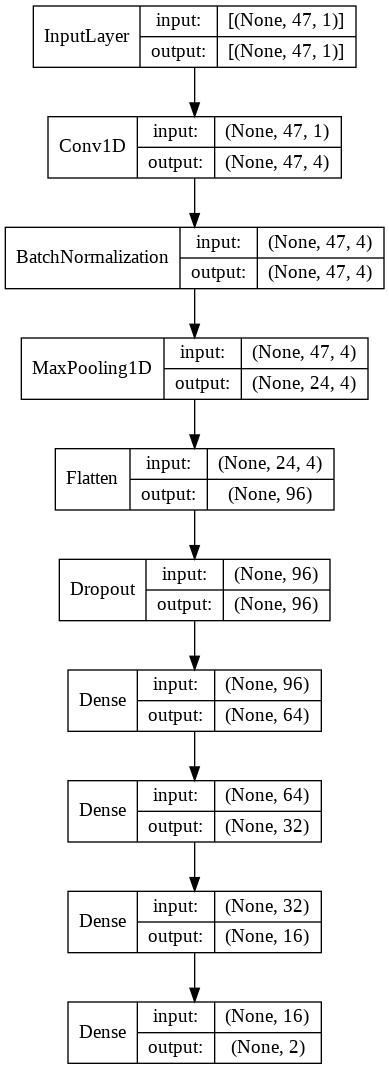

In [ ]:
keras.utils.plot_model(
    model_cnn,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
model_cnn_results = []
for i in range(k_folds):
   print("Training K Fold: ",i+1)
   model_cnn_results.append(model_cnn.fit( X_train, y_train, epochs = 50, batch_size =64, shuffle = True, validation_data = (X_test, y_test)))
   y_pred_cnn =  model_cnn.predict(X_test)
   metrics(model_cnn, y_test.argmax(axis=1), y_pred_cnn.argmax(axis=1))


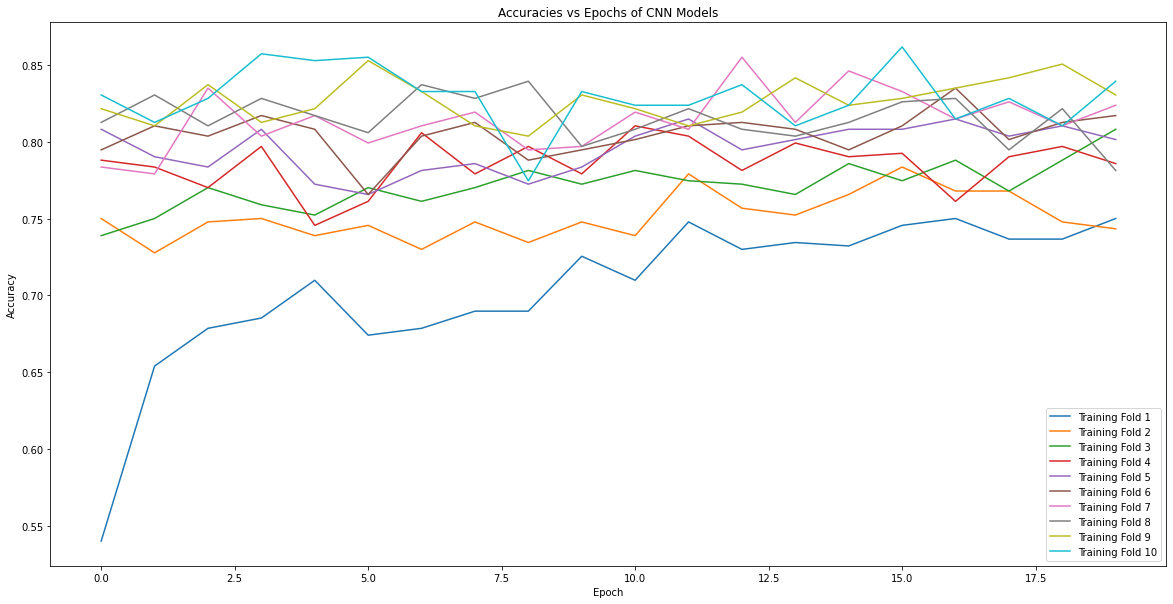

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Accuracies vs Epochs of CNN Models')
plt.plot(model_cnn_results[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_cnn_results[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_cnn_results[2].history['accuracy'], label='Training Fold 3')
plt.plot(model_cnn_results[3].history['accuracy'], label='Training Fold 4')
plt.plot(model_cnn_results[4].history['accuracy'], label='Training Fold 5')
plt.plot(model_cnn_results[5].history['accuracy'], label='Training Fold 6')
plt.plot(model_cnn_results[6].history['accuracy'], label='Training Fold 7')
plt.plot(model_cnn_results[7].history['accuracy'], label='Training Fold 8')
plt.plot(model_cnn_results[8].history['accuracy'], label='Training Fold 9')
plt.plot(model_cnn_results[9].history['accuracy'], label='Training Fold 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_cnn =  model_cnn.predict(X_test)
metrics(model_cnn, y_test.argmax(axis=1), y_pred_cnn.argmax(axis=1))

# RNN

In [ ]:
def rnn_model(len):
    model = Sequential()
    model.add(LSTM(128, return_sequences = True, input_shape=(len, 1)))
    model.add(LSTM(128, return_sequences = True))
    model.add(Dropout(0.50))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax'))
    model.summary()
    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer=adam, 
                  loss='binary_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
model_rnn = rnn_model(len)

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_164 (LSTM)             (None, 47, 128)           66560     
                                                                 
 lstm_165 (LSTM)             (None, 47, 128)           131584    
                                                                 
 dropout_249 (Dropout)       (None, 47, 128)           0         
                                                                 
 dense_750 (Dense)           (None, 47, 64)            8256      
                                                                 
 dense_751 (Dense)           (None, 47, 32)            2080      
                                                                 
 dense_752 (Dense)           (None, 47, 16)            528       
                                                                 
 dense_753 (Dense)           (None, 47, 8)           

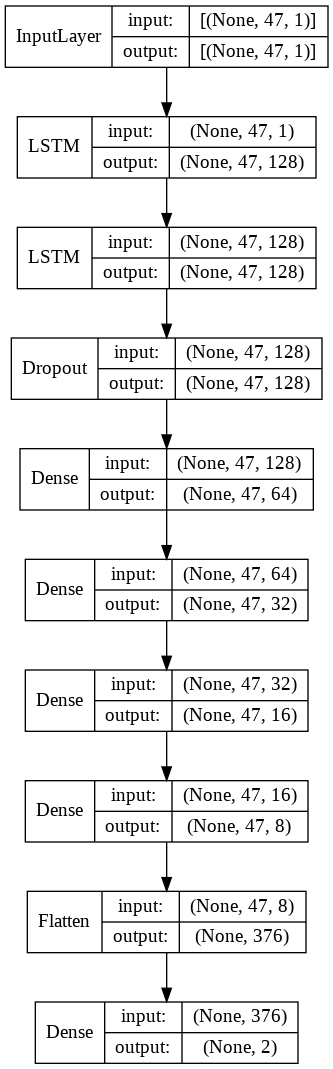

In [ ]:
keras.utils.plot_model(
    model_rnn,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
model_rnn_results = []
for i in range(k_folds):
   print("Training K Fold: ",i+1)
   model_rnn_results.append(model_rnn.fit( X_train, y_train, epochs = 70, batch_size =128, shuffle = True, validation_data = (X_test, y_test)))
   y_pred_rnn =  model_rnn.predict(X_test)
   metrics(model_rnn, y_test.argmax(axis=1), y_pred_rnn.argmax(axis=1))


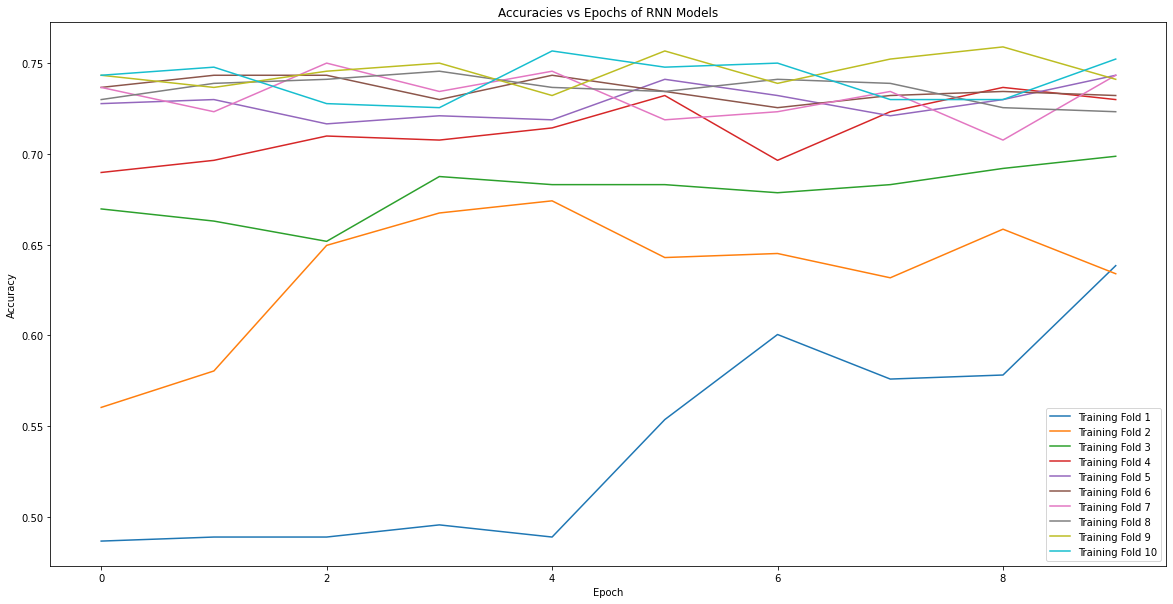

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Accuracies vs Epochs of RNN Models')
plt.plot(model_rnn_results[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_rnn_results[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_rnn_results[2].history['accuracy'], label='Training Fold 3')
plt.plot(model_rnn_results[3].history['accuracy'], label='Training Fold 4')
plt.plot(model_rnn_results[4].history['accuracy'], label='Training Fold 5')
plt.plot(model_rnn_results[5].history['accuracy'], label='Training Fold 6')
plt.plot(model_rnn_results[6].history['accuracy'], label='Training Fold 7')
plt.plot(model_rnn_results[7].history['accuracy'], label='Training Fold 8')
plt.plot(model_rnn_results[8].history['accuracy'], label='Training Fold 9')
plt.plot(model_rnn_results[9].history['accuracy'], label='Training Fold 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_rnn =  model_rnn.predict(X_test)
metrics(model_rnn, y_test.argmax(axis=1), y_pred_rnn.argmax(axis=1))



# DNN

In [ ]:
def dnn_model(len):
      input = Input(shape=(len, ))
      x = Dense(32)(input)
      x = BatchNormalization()(x)
      x = Dropout(0.5)(x)
      x = Activation('relu')(x)
      x = Dense(64)(x)
      x = BatchNormalization()(x)
      x = Dropout(0.5)(x)
      x = Activation('relu')(x)
      x = Dense(32)(x)
      x = BatchNormalization()(x)
      x = Activation('relu')(x)
      prediction = Dense(2, activation='softmax')(x)
      model = Model(inputs=input, outputs=prediction)
      model.summary()
      adam = Adam(learning_rate = 0.001)
      model.compile(optimizer=adam, 
                    loss='categorical_crossentropy',
                    metrics = ['accuracy'])

      return model

In [ ]:
model_dnn = dnn_model(len)

Model: "model_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_83 (InputLayer)       [(None, 47)]              0         
                                                                 
 dense_755 (Dense)           (None, 32)                1536      
                                                                 
 batch_normalization_249 (Ba  (None, 32)               128       
 tchNormalization)                                               
                                                                 
 dropout_250 (Dropout)       (None, 32)                0         
                                                                 
 activation_246 (Activation)  (None, 32)               0         
                                                                 
 dense_756 (Dense)           (None, 64)                2112      
                                                          

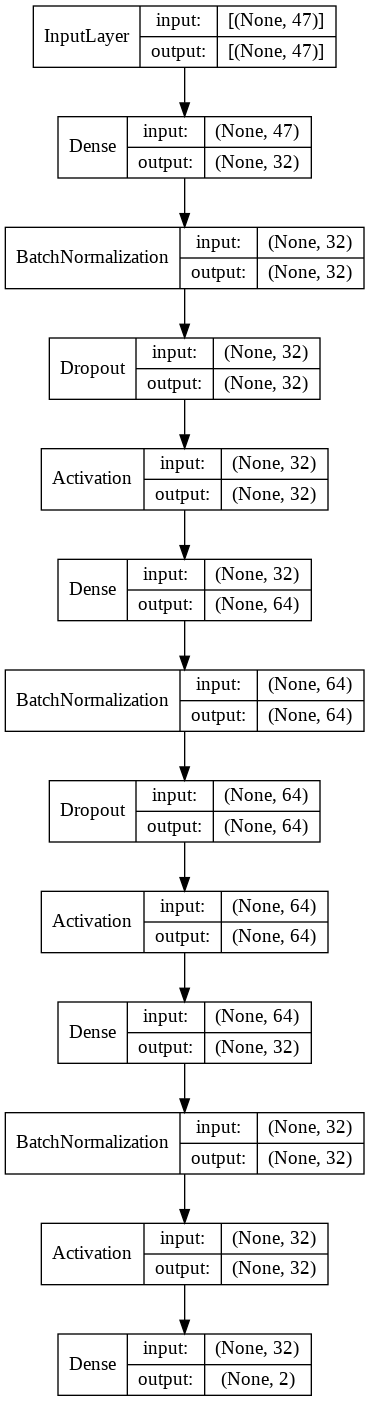

In [ ]:
keras.utils.plot_model(
    model_dnn,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [2]:
model_dnn_results = []
for i in range(k_folds):
   print("Training K Fold: ",i+1)
   model_dnn_results.append(model_dnn.fit( X_train, y_train, epochs = 50, batch_size =32, shuffle = True, validation_data = (X_test, y_test)))
   y_pred_dnn =  model_dnn.predict(X_test)
   metrics(model_dnn, y_test.argmax(axis=1), y_pred_dnn.argmax(axis=1))

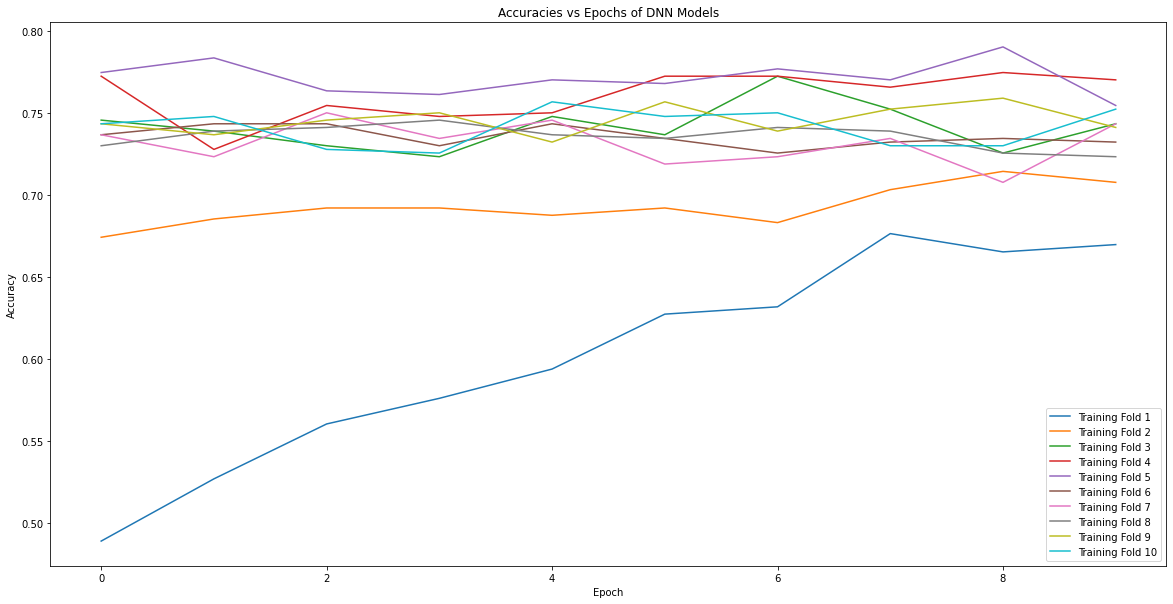

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Accuracies vs Epochs of DNN Models')
plt.plot(model_dnn_results[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_dnn_results[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_dnn_results[2].history['accuracy'], label='Training Fold 3')
plt.plot(model_dnn_results[3].history['accuracy'], label='Training Fold 4')
plt.plot(model_dnn_results[4].history['accuracy'], label='Training Fold 5')
plt.plot(model_rnn_results[5].history['accuracy'], label='Training Fold 6')
plt.plot(model_rnn_results[6].history['accuracy'], label='Training Fold 7')
plt.plot(model_rnn_results[7].history['accuracy'], label='Training Fold 8')
plt.plot(model_rnn_results[8].history['accuracy'], label='Training Fold 9')
plt.plot(model_rnn_results[9].history['accuracy'], label='Training Fold 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_dnn =  model_dnn.predict(X_test)
metrics(model_dnn, y_test.argmax(axis=1), y_pred_dnn.argmax(axis=1))

# Hyperparameter

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from scikeras.wrappers import KerasClassifier

In [ ]:
def cnn_model_hyper(filters, kernel_size, pool_size, strides, dropout_rate):
    model = Sequential()
    
    model.add(Conv1D(filters=filters,
                     kernel_size=kernel_size,
                     activation='relu',
                     padding='same',
                     input_shape=(47, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=pool_size,
                        strides=strides,
                        padding='same'))

    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, 
                    activation='relu'))
    model.add(Dense(32, 
                    activation='relu'))
    model.add(Dense(16, 
                    activation='relu'))
    model.add(Dense(2, 
                    activation='softmax'))
    
    model.summary()
    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer=adam, 
                  loss='binary_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
batch_size = [32, 64, 128] 
epochs = [30 ,50, 70]
filters = [0, 2, 4]
kernel_size = [2, 4, 6]
pool_size = [2, 4, 6]
strides = [2, 4, 6]
dropout_rate = [0.25, 0.50, 0.75]

In [ ]:
param_grid = dict(epochs=epochs, 
                  batch_size=batch_size,
                  filters=filters,
                  kernel_size=kernel_size,
                  pool_size=pool_size,
                  strides=strides,
                  dropout_rate=dropout_rate)

In [ ]:
model = KerasClassifier(model=cnn_model_hyper, 
                        dropout_rate = [0.25, 0.50, 0.75],
                        filters = [0, 2, 4, 6, 8],
                        kernel_size = [2, 4, 6, 8, 10],
                        pool_size = [2, 4, 6, 8, 10],
                        strides = [2, 4, 6, 8, 10]
                        )

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, verbose=2)
grid_result = grid.fit(X_train, y_train) 


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
mean = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
param = grid_result.cv_results_['params']
for mean, stdev, param in zip(mean, std, param):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
def rnn_model_hyper(dropout_rate):
    model = Sequential()
    model.add(LSTM(128, return_sequences = True, input_shape=(47, 1)))
    model.add(LSTM(128, return_sequences = True))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(2, activation = 'softmax'))
    model.summary()
    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer=adam, 
                  loss='binary_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
param_grid_rnn = dict(epochs=epochs, 
                  batch_size=batch_size,
                  dropout_rate=dropout_rate)

In [ ]:
model_rnn_hyper = KerasClassifier(model=rnn_model_hyper, 
                        dropout_rate = [0.25, 0.50, 0.75])

In [ ]:
grid_rnn = GridSearchCV(estimator=model_rnn_hyper, param_grid=param_grid_rnn, n_jobs=1, cv=3, verbose=2)
grid_result_rnn = grid_rnn.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result_rnn.best_score_, grid_result_rnn.best_params_))
mean = grid_result_rnn.cv_results_['mean_test_score']
std = grid_result_rnn.cv_results_['std_test_score']
param = grid_result_rnn.cv_results_['params']
for mean, stdev, param in zip(mean, std, param):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
def dnn_model_hyper(dropout_rate):
      input = Input(shape=(47, ))
      x = Dense(32)(input)
      x = BatchNormalization()(x)
      x = Dropout(dropout_rate)(x)
      x = Activation('relu')(x)
      x = Dense(64)(x)
      x = BatchNormalization()(x)
      x = Dropout(dropout_rate)(x)
      x = Activation('relu')(x)
      x = Dense(32)(x)
      x = BatchNormalization()(x)
      x = Activation('relu')(x)
      predictions = Dense(2, activation='softmax')(x)
      model = Model(inputs=input, outputs=predictions)
      model.summary()
      adam = Adam(learning_rate = 0.001)
      model.compile(optimizer=adam, 
                    loss='binary_crossentropy',
                    metrics = ['accuracy'])

      return model

In [ ]:
param_grid_dnn = dict(epochs=epochs, 
                  batch_size=batch_size,
                  dropout_rate=dropout_rate)

In [ ]:
model_dnn_hyper = KerasClassifier(model=dnn_model_hyper, 
                        dropout_rate = [0.25, 0.50, 0.75])

In [ ]:
grid_dnn = GridSearchCV(estimator=model_dnn_hyper, param_grid=param_grid_dnn, n_jobs=1, cv=3, verbose=2)
grid_result_dnn = grid_dnn.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result_dnn.best_score_, grid_result_dnn.best_params_))
mean = grid_result_dnn.cv_results_['mean_test_score']
std = grid_result_dnn.cv_results_['std_test_score']
param = grid_result_dnn.cv_results_['params']
for mean, stdev, param in zip(mean , std, param):
    print("%f (%f) with: %r" % (mean, stdev, param))